In [1]:
import re

CLASS_NAME = re.compile(r'_[0-9]*\.(jpg|jpeg|png)')

In [2]:
import os

In [3]:
training_classes = list()
for train_dir in os.listdir('../dataset/train/'):
    training_classes.append(train_dir)

In [4]:
for test_image in os.listdir('../dataset/test/'):
    test_class = CLASS_NAME.sub("", test_image)
    if test_class in training_classes:
        filename = f"pic_{str(len(os.listdir(f'../dataset/train/{test_class}'))).zfill(4)}.jpg"
        os.rename(f"../dataset/test/{test_image}", f"../dataset/train/{test_class}/{filename}")

In [5]:
import shutil

In [6]:
for training_class in os.listdir('../dataset/train/'):
    num_samples = len(os.listdir(f'../dataset/train/{training_class}'))
    if num_samples > 1050:
        print(training_class, num_samples)
    else:
        shutil.rmtree(f'../dataset/train/{training_class}')

krusty_the_clown 1206
ned_flanders 1503
homer_simpson 2296
lisa_simpson 1354
marge_simpson 1341
charles_montgomery_burns 1193
bart_simpson 1392
moe_szyslak 1502
principal_skinner 1244
milhouse_van_houten 1079


In [7]:
import cv2

In [8]:
img = cv2.imread('../dataset/train/ned_flanders/pic_0001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (28, 28))
img.shape

(28, 28, 3)

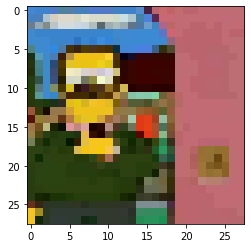

In [9]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [10]:
import random

In [11]:
for training_class in os.listdir('../dataset/train/'):
    print(training_class)
    training_images = os.listdir(f'../dataset/train/{training_class}')
    random.shuffle(training_images)
    training_images = training_images[:1000]
    for image in training_images:
        filename = f'../dataset/train/{training_class}/{image}'
        image = cv2.imread(filename)
        image = cv2.resize(image, (28, 28))
        cv2.imwrite(filename, image)
    cut = int(len(training_images)*.8)
    train_mnist = training_images[:cut]
    os.makedirs(f"../dataset/train_mnist/{training_class}")
    for image in train_mnist:
        os.rename(f"../dataset/train/{training_class}/{image}", f"../dataset/train_mnist/{training_class}/{image}")
    test_mnist = training_images[cut:]
    os.makedirs(f"../dataset/test_mnist/{training_class}")
    for image in test_mnist:
        os.rename(f"../dataset/train/{training_class}/{image}", f"../dataset/test_mnist/{training_class}/{image}")
    print(f"{training_class} completed!")

krusty_the_clown
krusty_the_clown completed!
ned_flanders
ned_flanders completed!
homer_simpson
homer_simpson completed!
lisa_simpson
lisa_simpson completed!
marge_simpson
marge_simpson completed!
charles_montgomery_burns
charles_montgomery_burns completed!
bart_simpson
bart_simpson completed!
moe_szyslak
moe_szyslak completed!
principal_skinner
principal_skinner completed!
milhouse_van_houten
milhouse_van_houten completed!


In [15]:
for train_mnist in os.listdir('../dataset/train_mnist/'):
    print(train_mnist, len(os.listdir(f'../dataset/train_mnist/{train_mnist}')))

krusty_the_clown 800
ned_flanders 800
homer_simpson 800
lisa_simpson 800
marge_simpson 800
charles_montgomery_burns 800
bart_simpson 800
moe_szyslak 800
principal_skinner 800
milhouse_van_houten 800


In [16]:
for test_mnist in os.listdir('../dataset/test_mnist/'):
    print(test_mnist, len(os.listdir(f'../dataset/test_mnist/{test_mnist}')))

krusty_the_clown 200
ned_flanders 200
homer_simpson 200
lisa_simpson 200
marge_simpson 200
charles_montgomery_burns 200
bart_simpson 200
moe_szyslak 200
principal_skinner 200
milhouse_van_houten 200
